In [2]:
import os
import csv
import numpy as np
from matplotlib import pyplot as plt 

In [5]:
file = '2011-12-08_0045-cam1-for-ss3_559807_4to234.csv'
utt_start = eval(file.split('_')[-1].split('to')[0])
utt_end = eval(file.split('_')[-1].split('to')[1][:-4])
utt_length = utt_end-utt_start+1

In [50]:
gt = np.zeros(utt_length)
with open('./csv/'+file) as csvfile:
    utterance_data = csv.reader(csvfile, delimiter=',')
    next(utterance_data)
    for row in utterance_data:
        start = int(float(row[15]))
        end = int(float(row[16]))
        for i in range(start, end+1):
            gt[i-utt_start] = 1
gt

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [46]:
type(gt[1])

numpy.float64

10

In [7]:
x1 = np.load("./gt/2011-12-01_0043-cam1-for-ss3_17583210_6676to6763.npy")
x1

array([0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

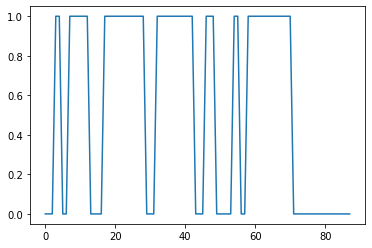

In [8]:
plt.plot(x1) 
plt.show()

In [34]:
x2 = np.load("./predicts/2011-12-01_0043-cam1-for-ss3_17583210_6676to6763.npy")
x2

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

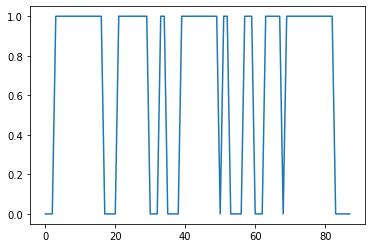

In [35]:
plt.plot(x2) 
plt.show()

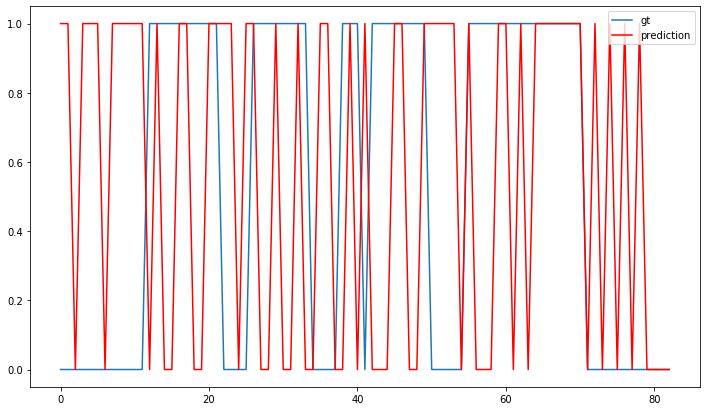

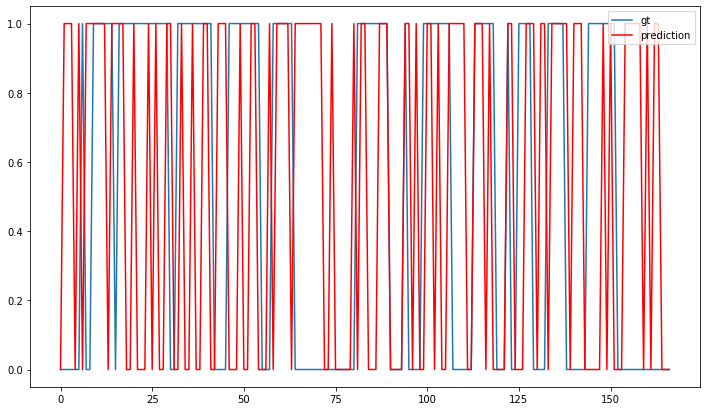

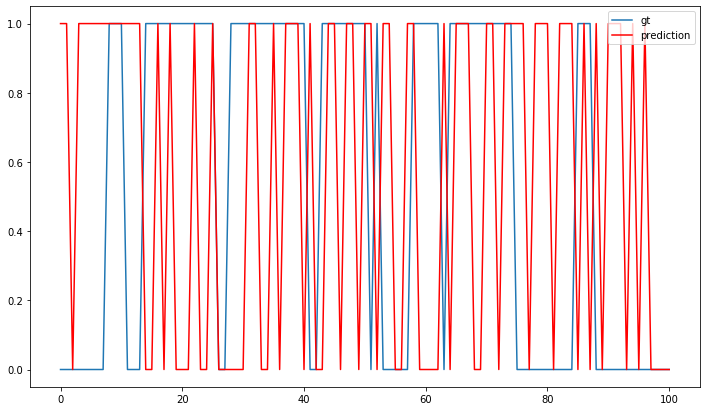

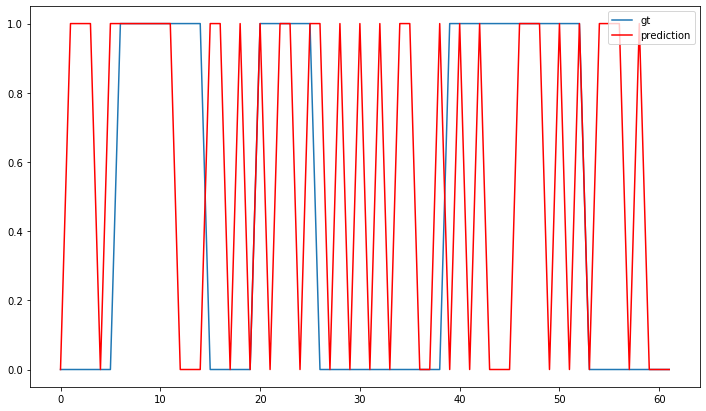

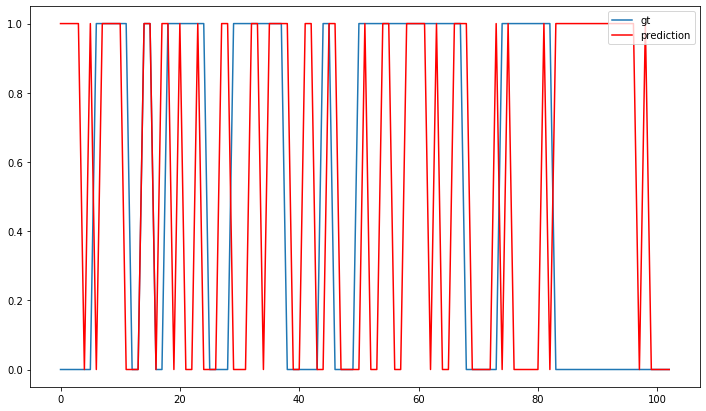

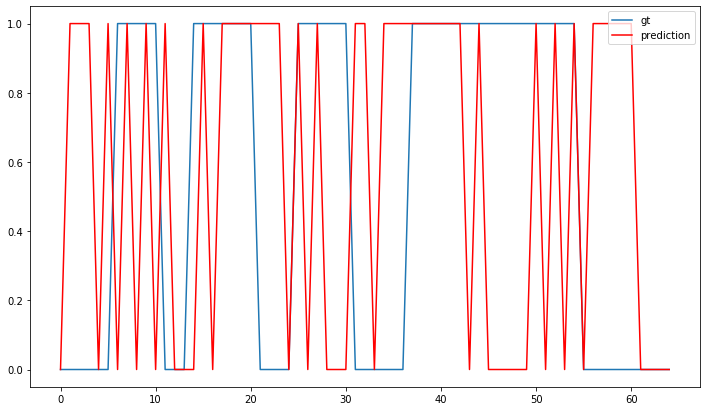

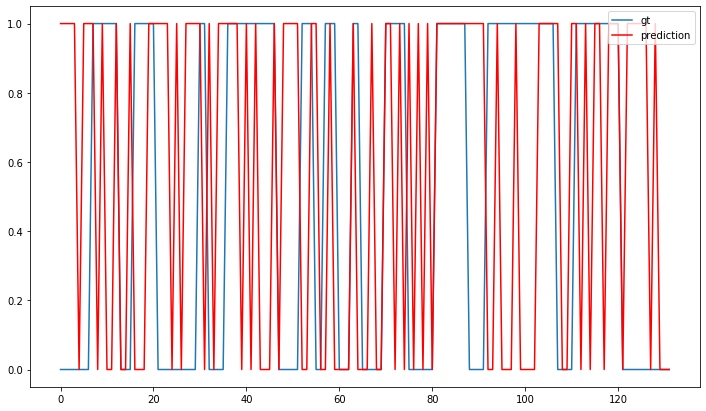

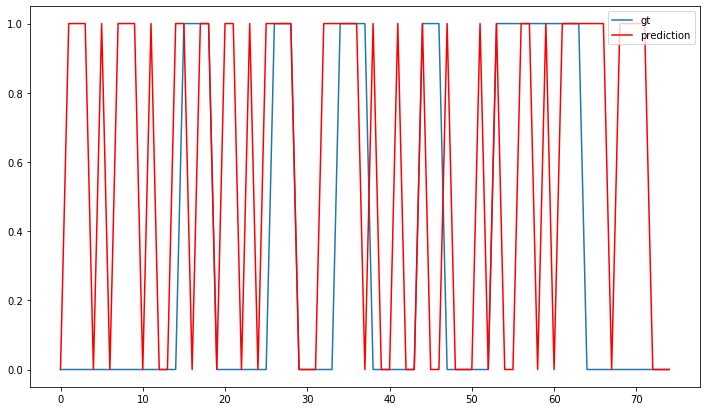

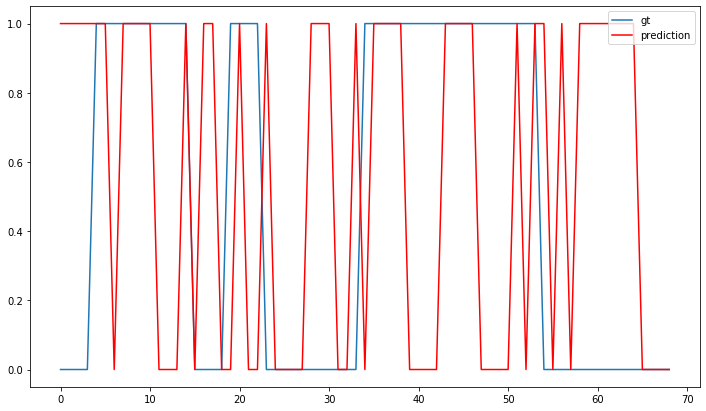

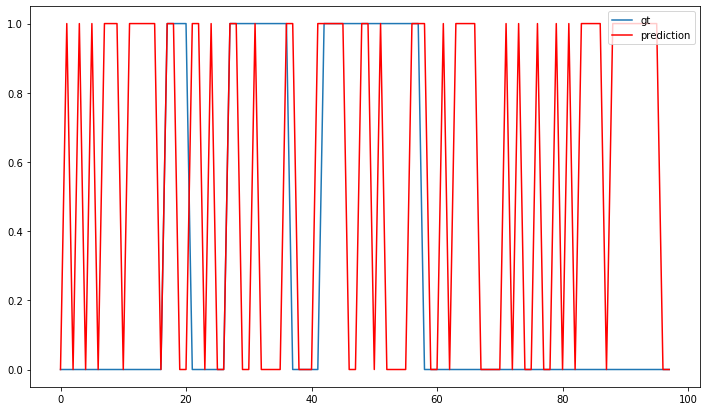

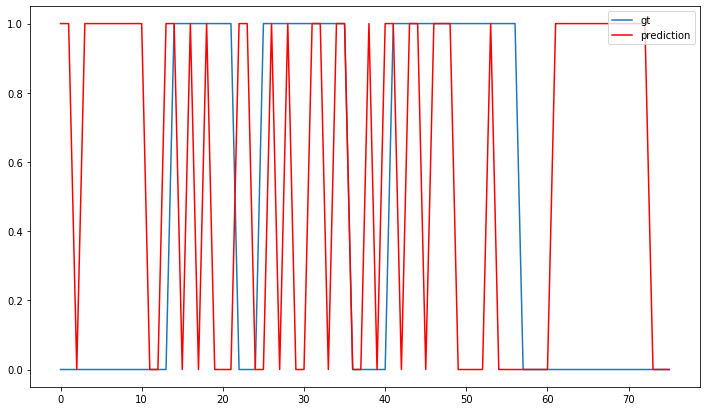

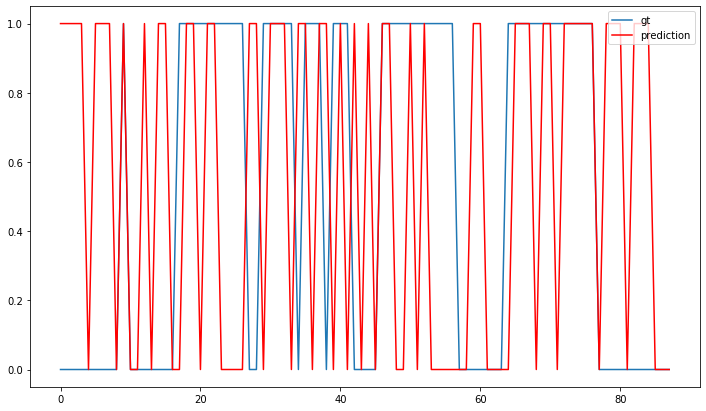

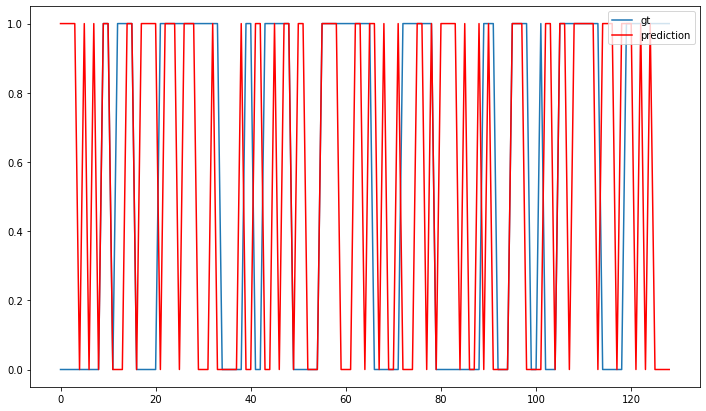

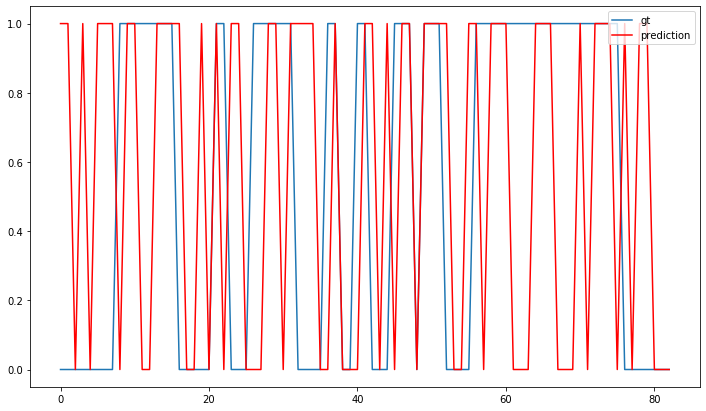

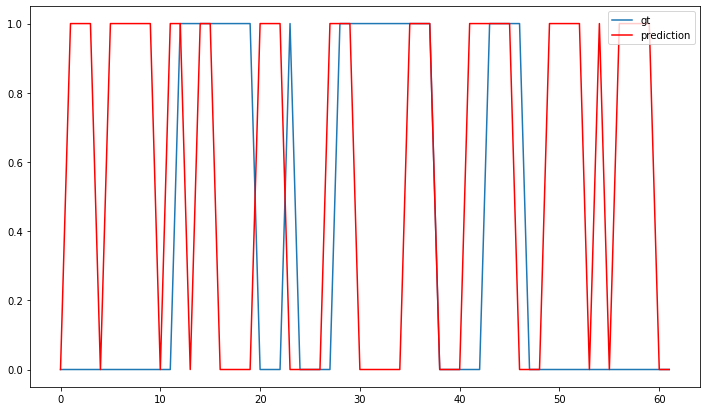

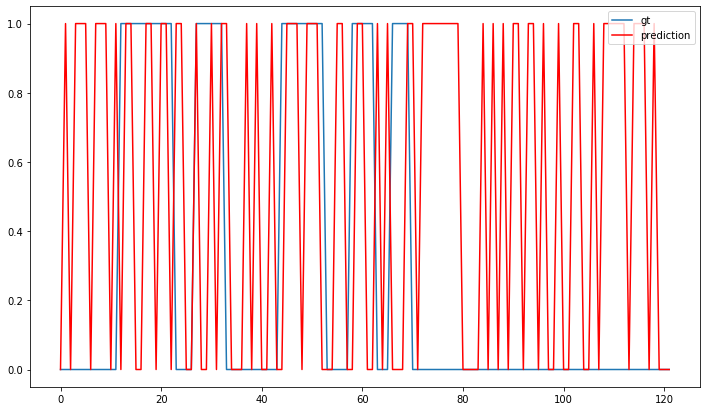

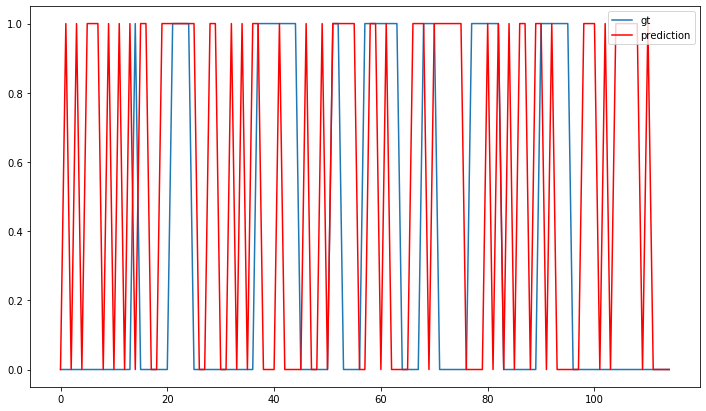

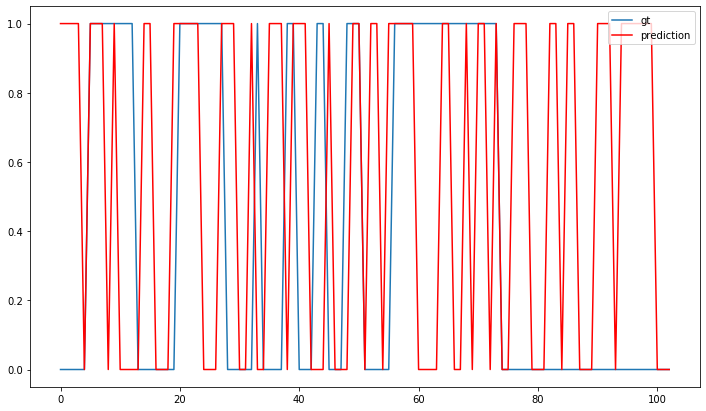

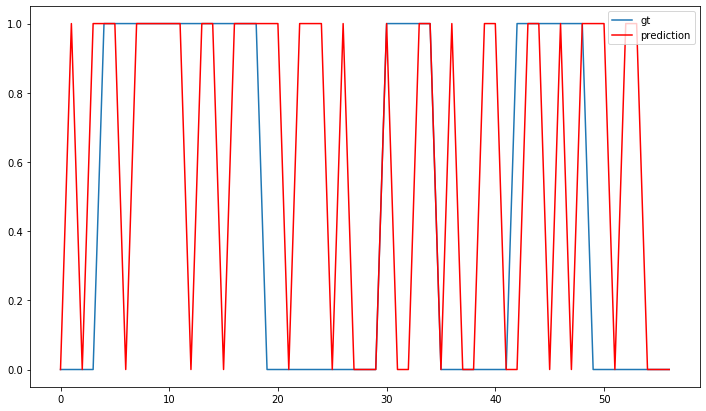

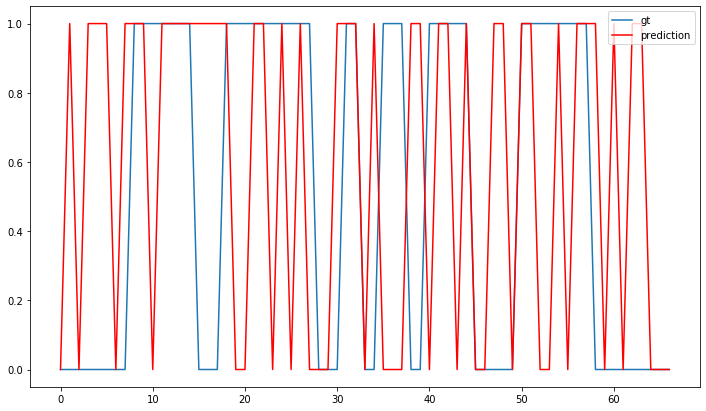

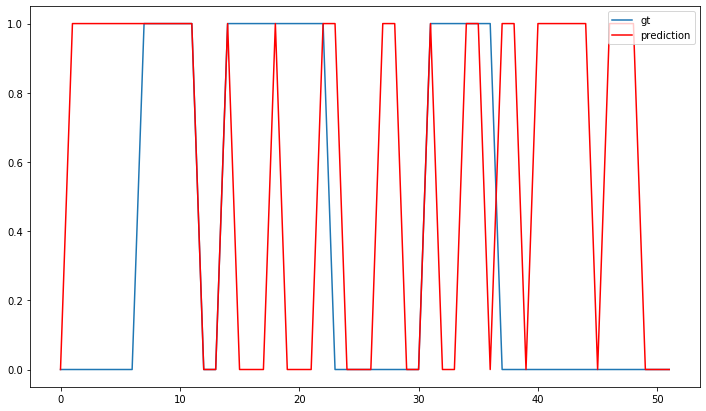

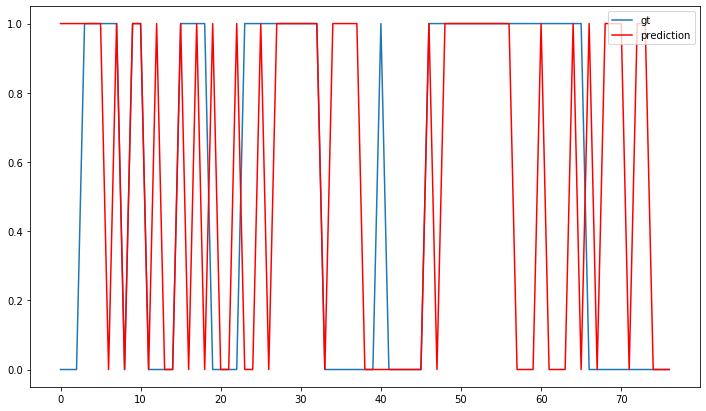

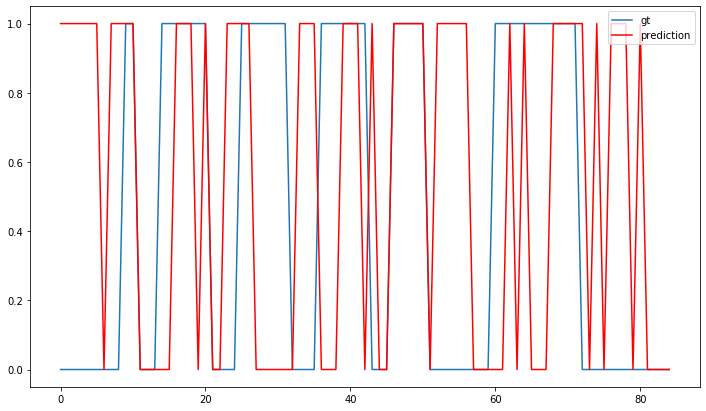

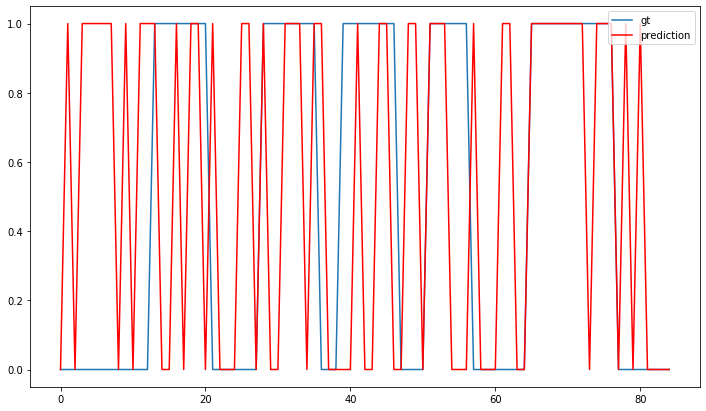

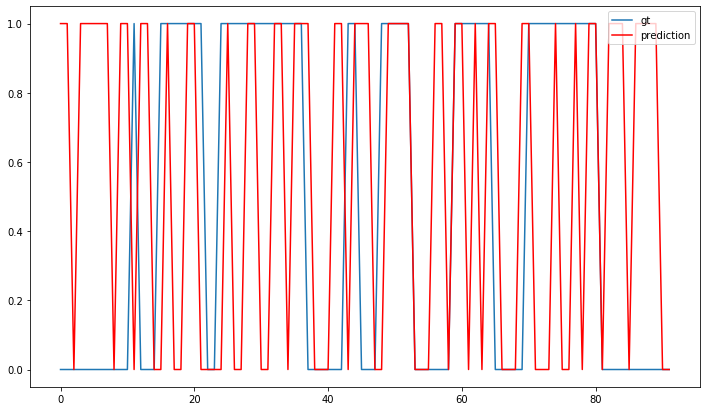

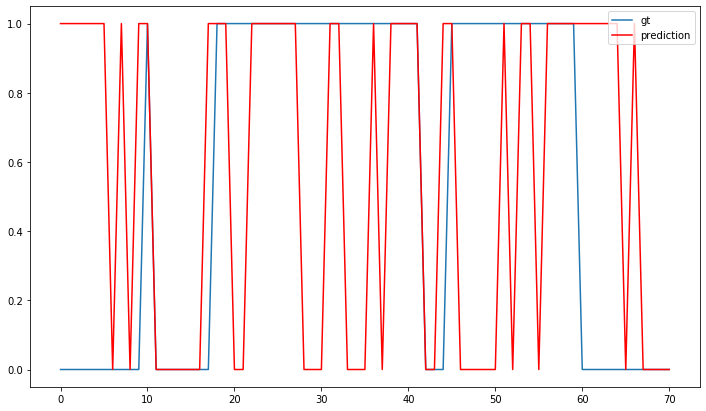

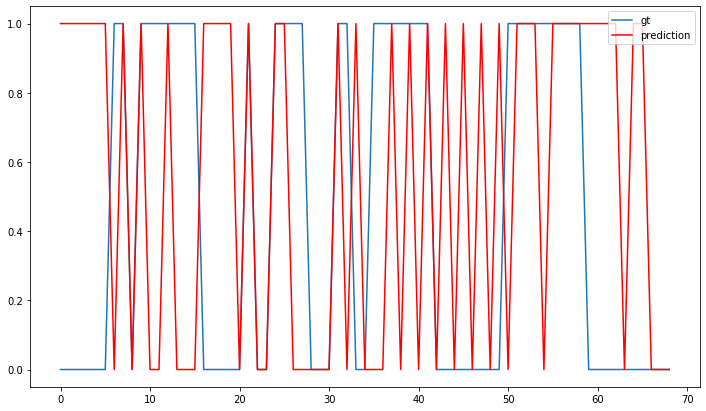

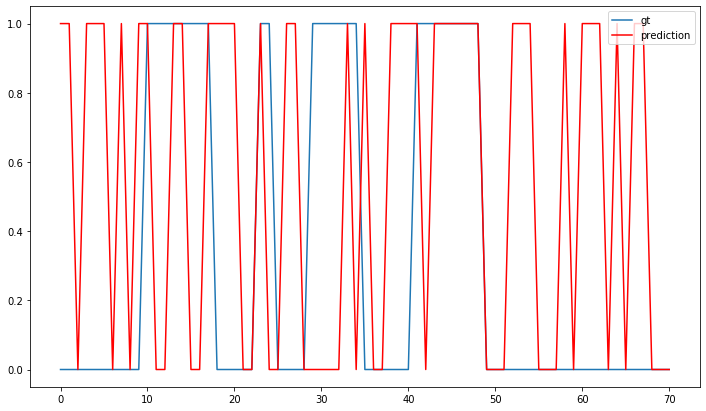

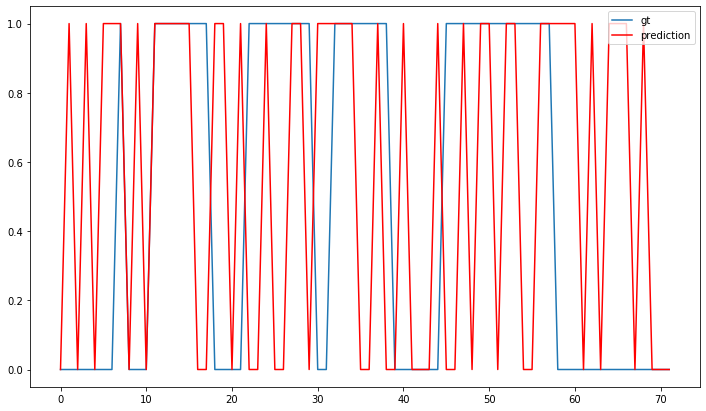

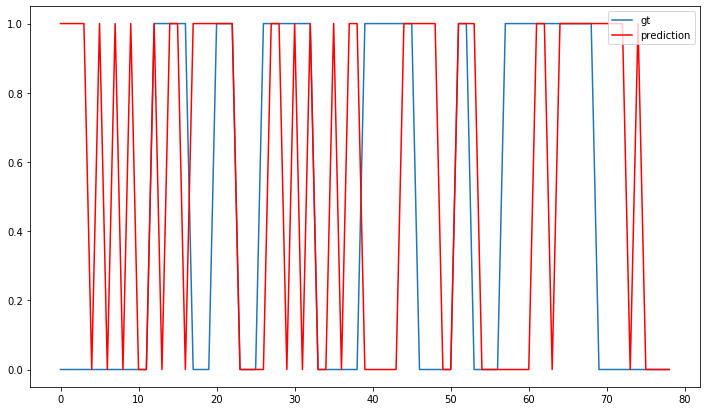

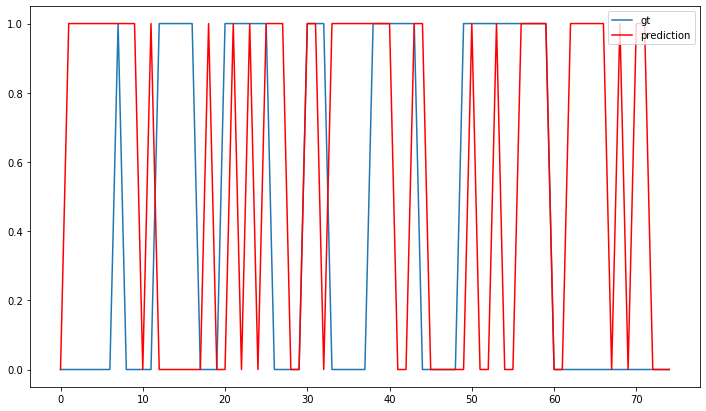

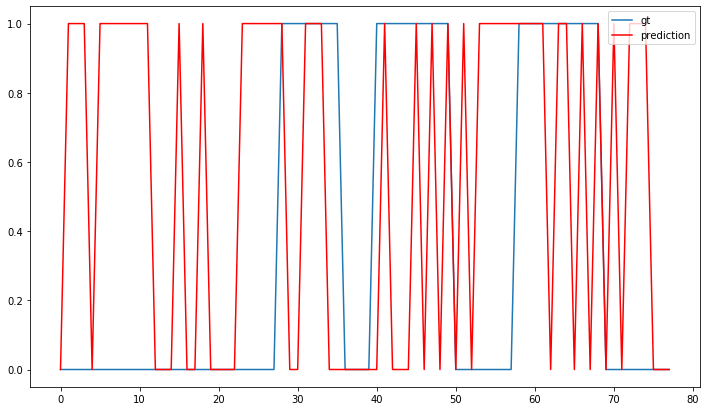

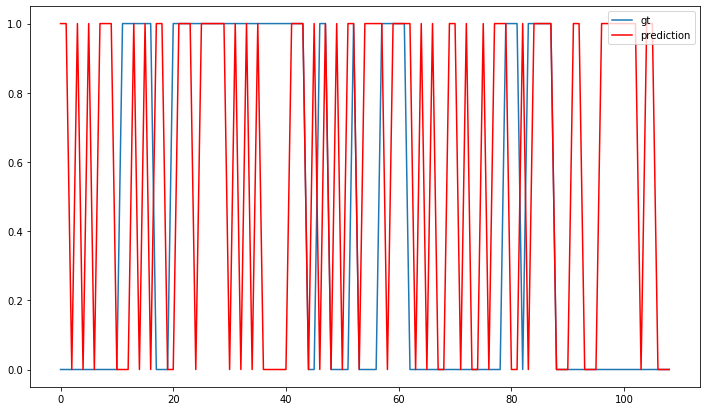

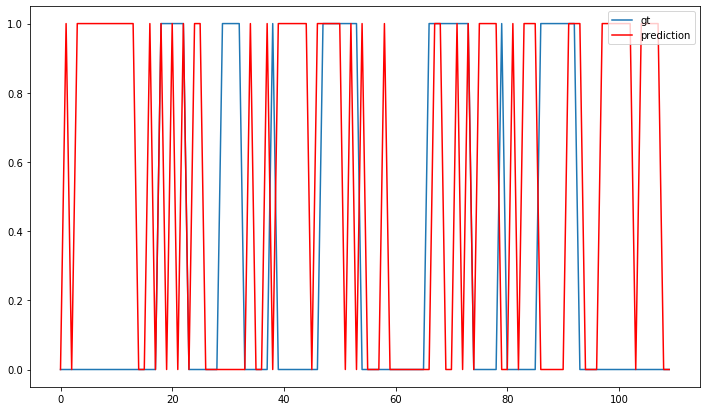

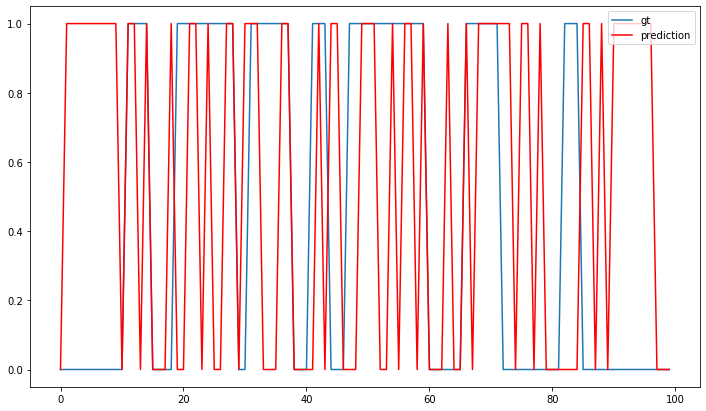

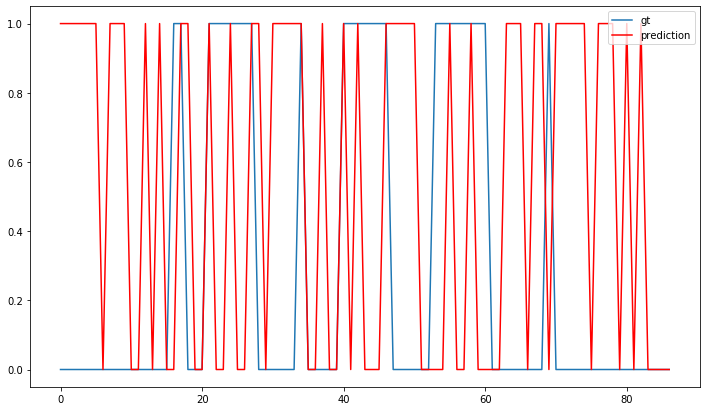

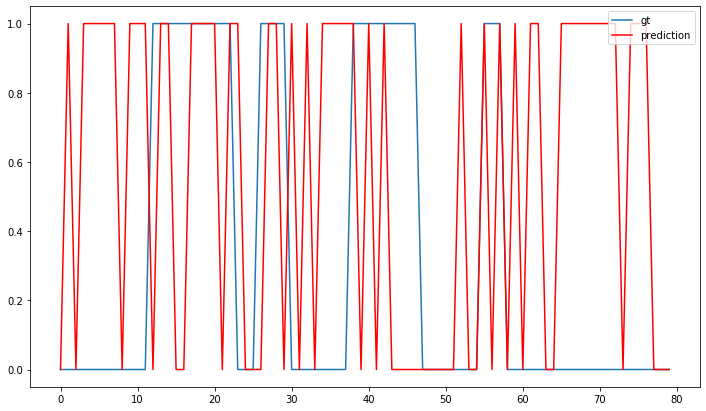

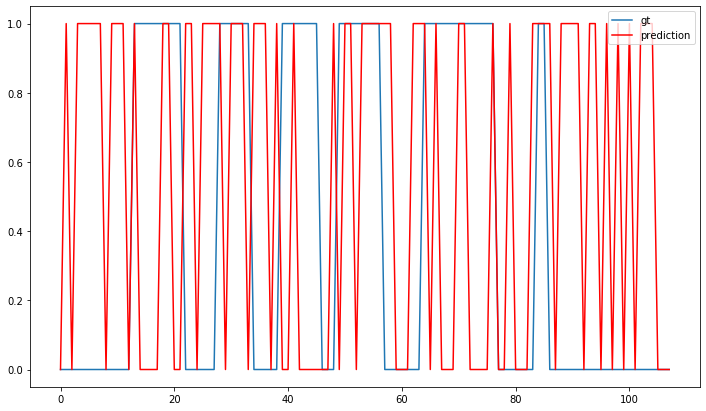

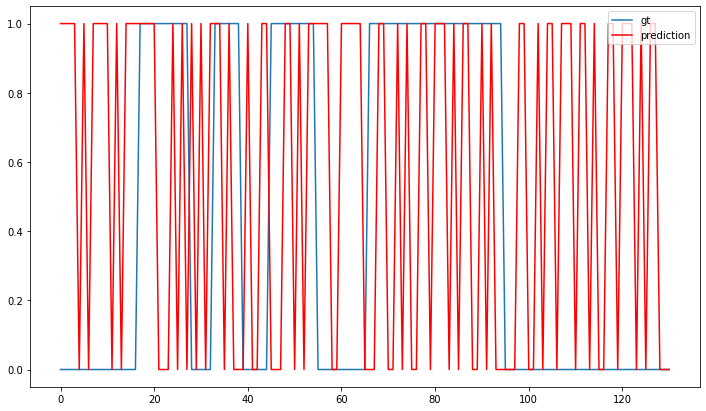

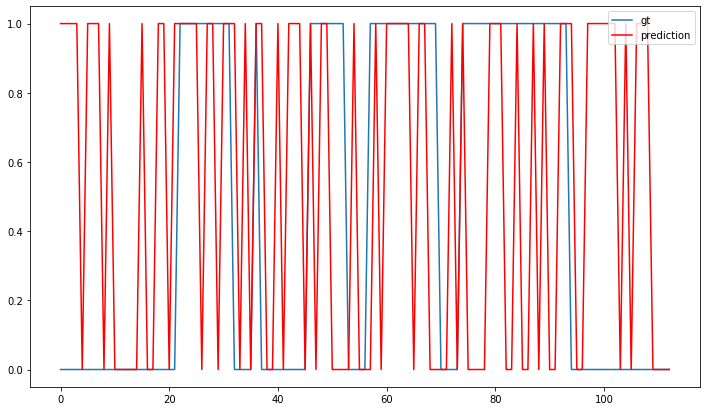

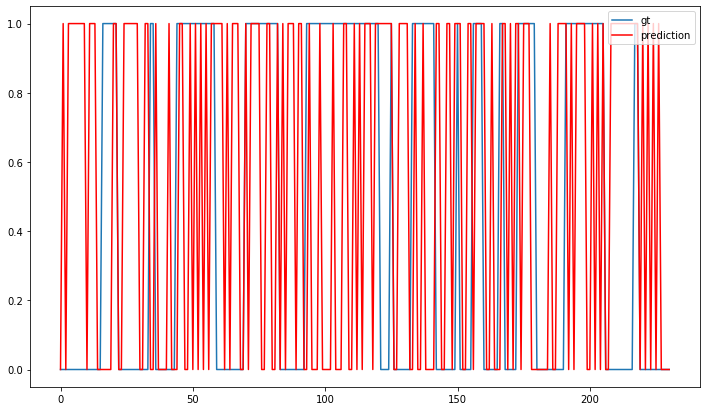

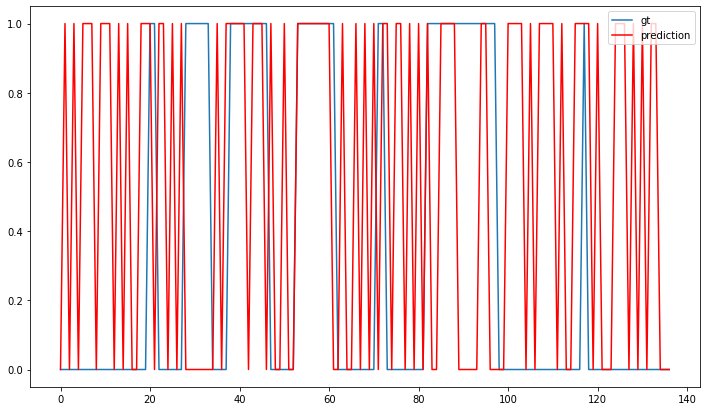

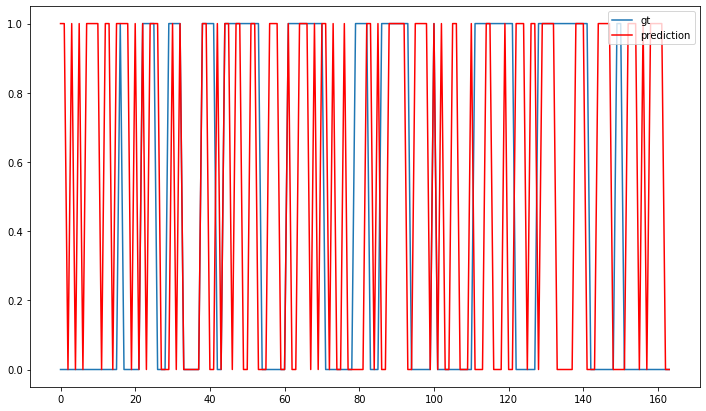

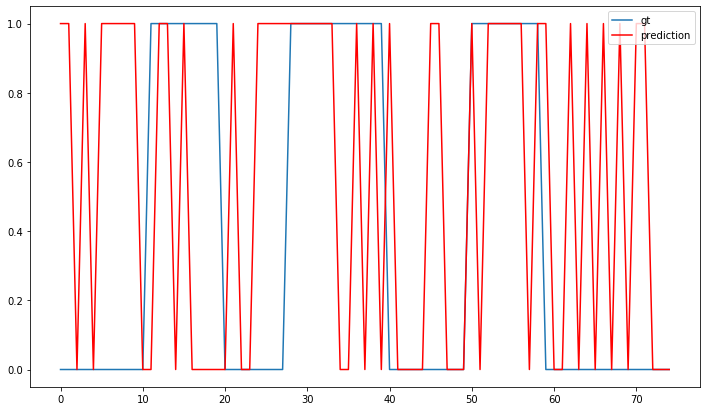

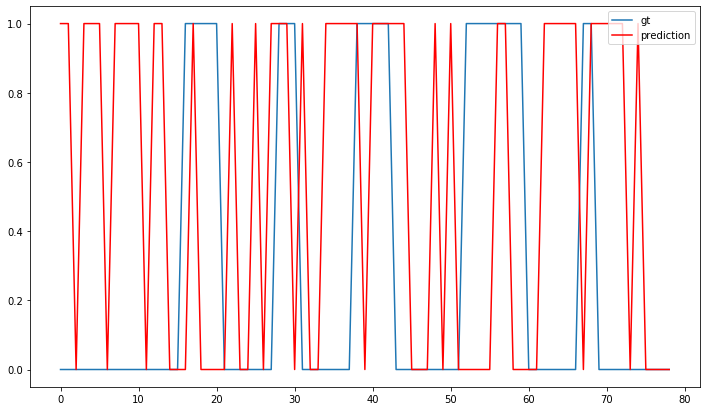

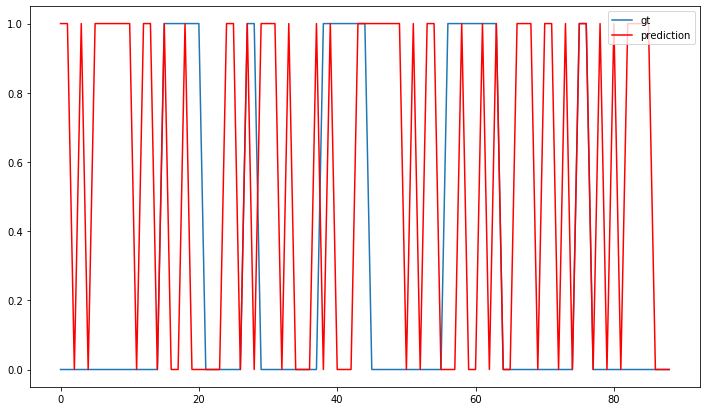

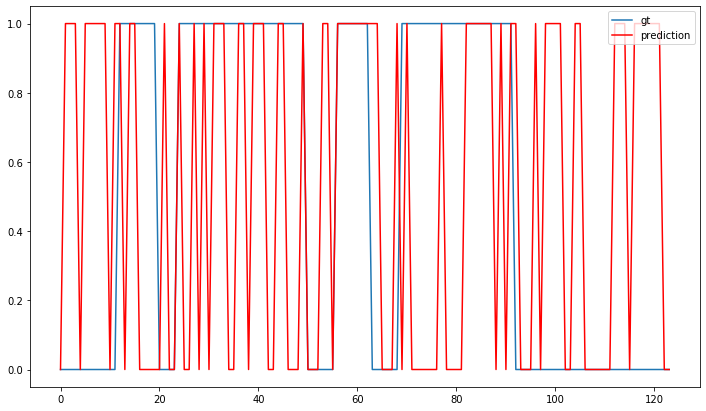

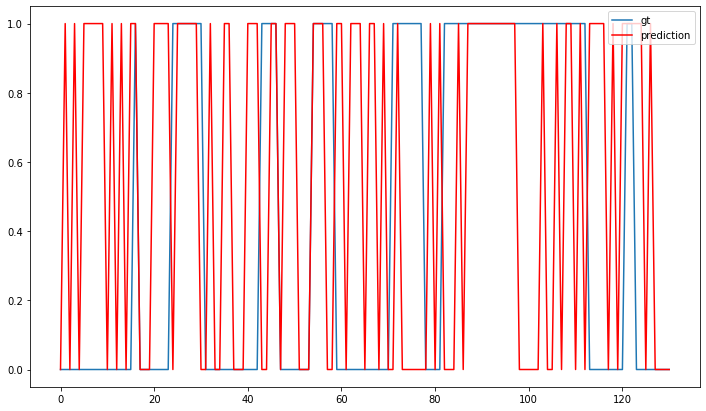

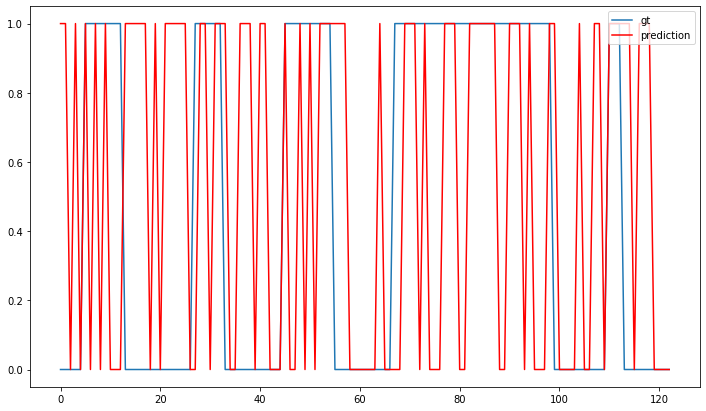

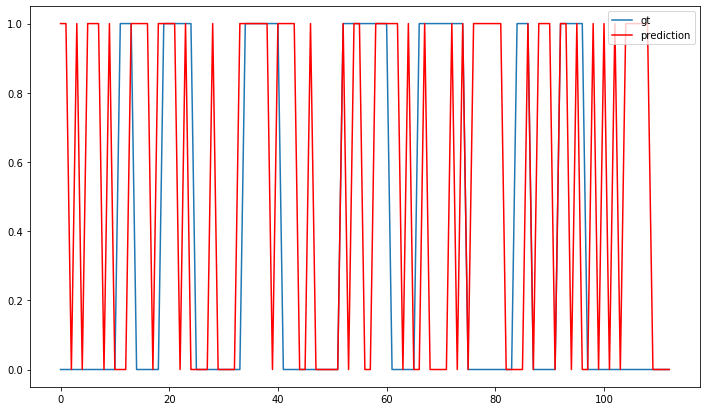

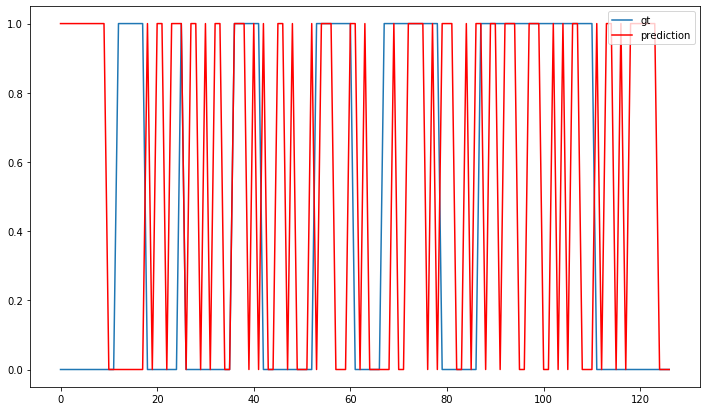

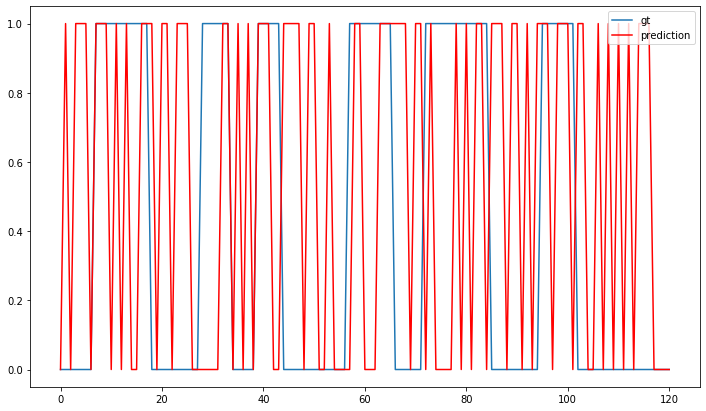

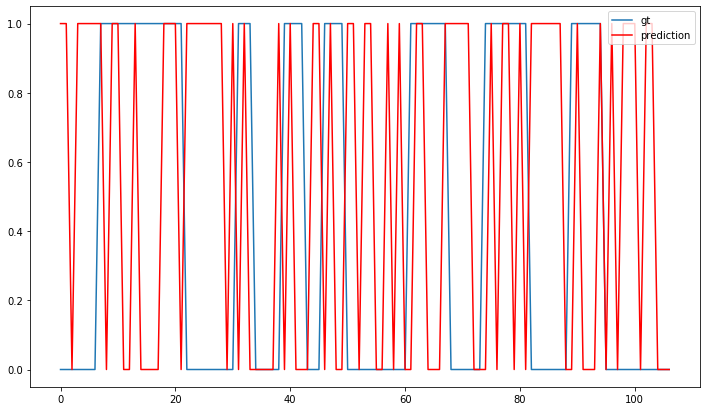

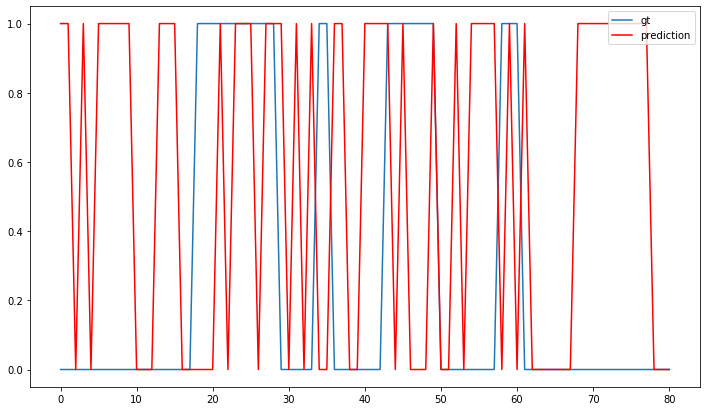

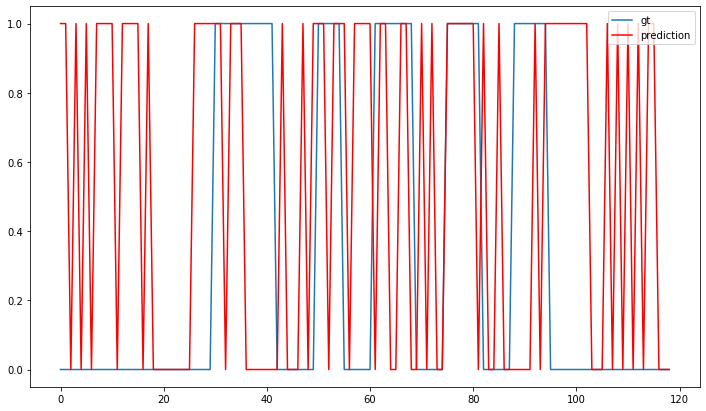

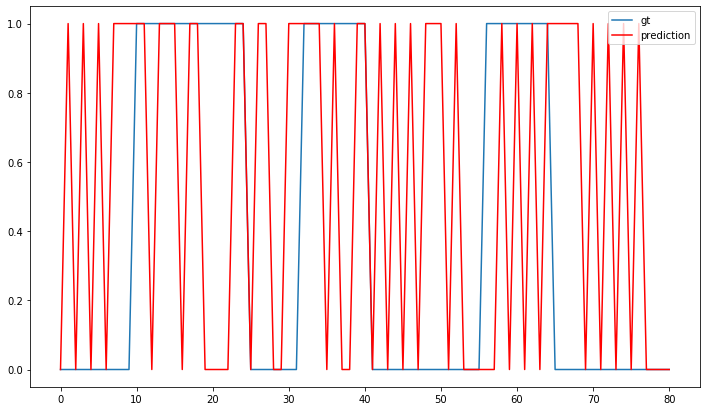

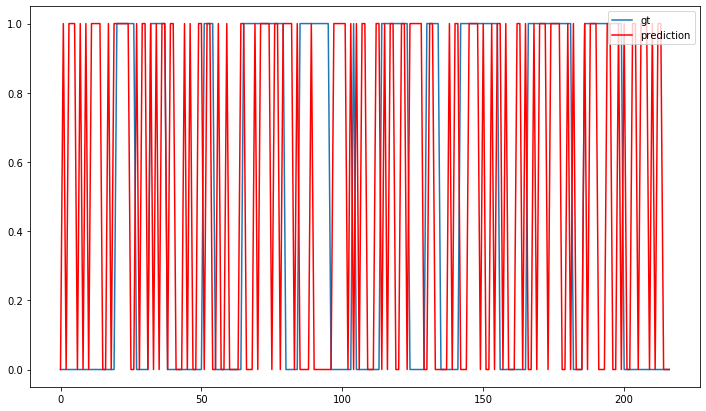

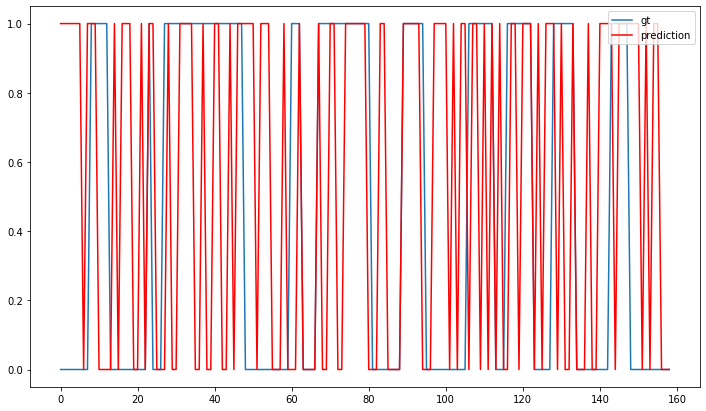

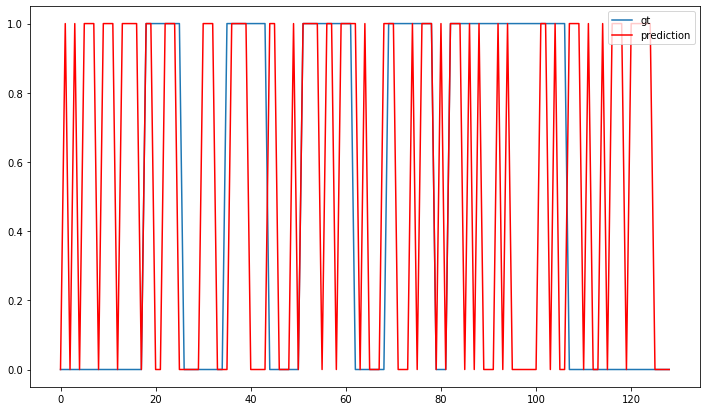

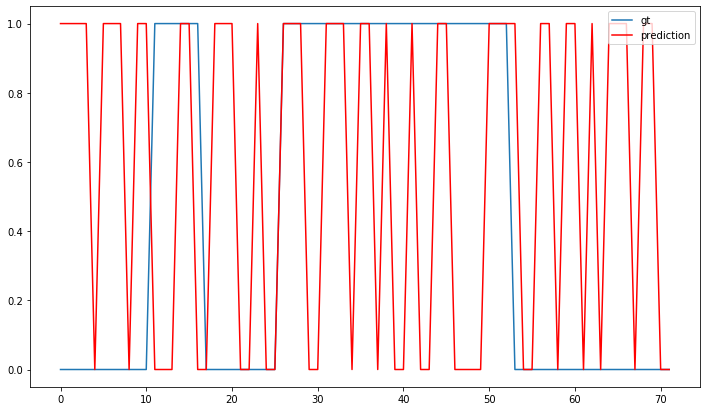

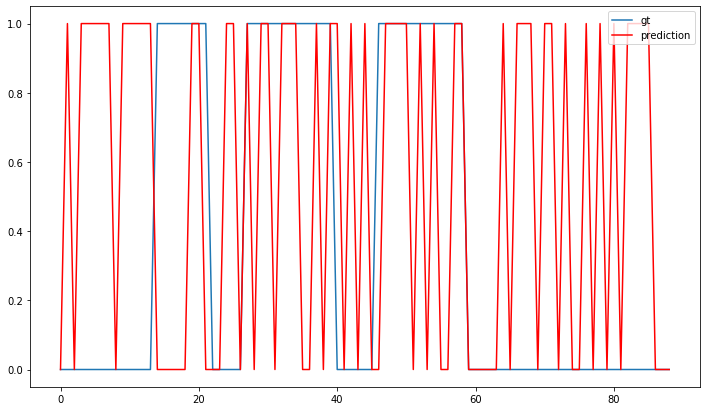

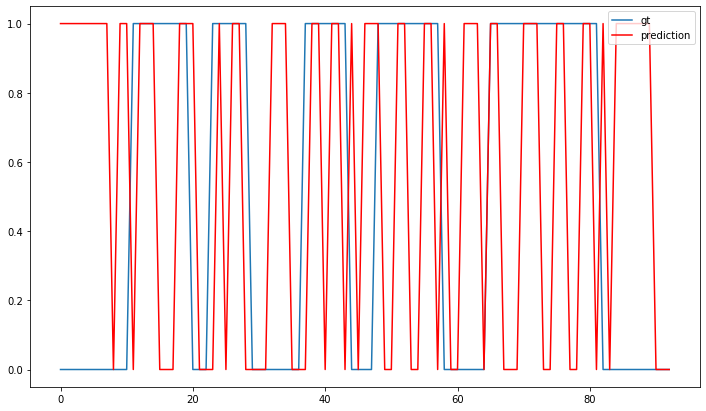

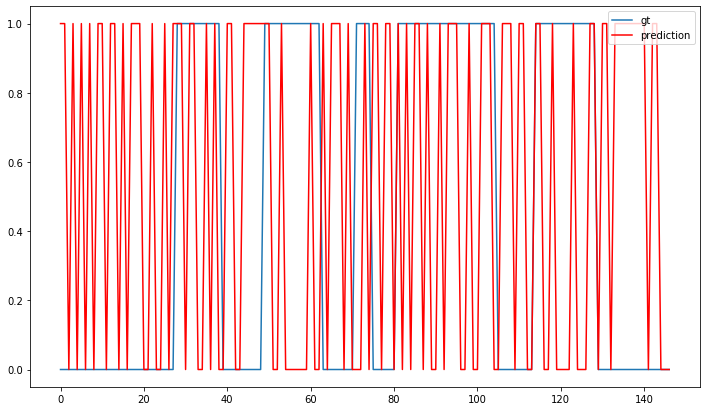

In [4]:
files = os.listdir('predicts')
for file in files:
    x1 = np.load("./gt/"+file)
    x2 = np.load("./predicts/"+file)
    for i in range(len(x2)):
        if x2[i]>0.5:
            x2[i]=1
        else:
            x2[i]=0
    fig = plt.figure(figsize=(12,7))
    plt.plot(x1, label="gt")
    plt.plot(x2, label="prediction", color='red')
    plt.legend(loc='upper right')
    plt.show()